# Boosting With Neural Networks

## Markdown Section

### Overview of the Boosting Algorithm

Boosting is an ensemble learning method. The idea of boosting algorithm is to create a single strong learner by combining the predictions of weak learners. This method was proposed by Freund and Schapire in the paper "A Decision-Theoretic Generalization of on-Line Learning and an Application to Boosting" in 1995 and mainly applied to classification tasks. In boosting, each weak learner will adjust its weight according to the results of the previous round of weak learners in continuous iterations. Boosting iteratively builds weak classifiers or regressors and this new learner will pay special attention to the samples that were misclassified or having bigger errors in the previous round, so as to better handle these samples that did not perform well in the subsequent iterations. Thus, models can gradually optimize the performance. In the final prediction stage, the prediction results of these weak learners will be weighted and summed according to certain weights to obtain the final prediction result. Based on boosting, Freund and Schapire also proposed AdaBoosting, the adaptive boosting algorithm, in the above paper. At the same time, Drucker further applied it to regression problems in 1997.
Adaboosting improves the adaptive mechanism: Adaboosting dynamically adjusts the sample weights and the weights of weak learners according to the error during the iteration process. This adaptive mechanism enables AdaBoosting to gradually optimize the model performance and improve the prediction accuracy.

### Advantages
- According to Drucker's 1997 paper "Improving Regressors using Boosting Techniques", AdaBoosting can achieve higher prediction performance by iteratively training multiple weak learners and reasonably combining their prediction results according to the weights.
- The AdaBoosting algorithm is relatively simple and easy to understand and implement.

### Disadvantages
- Since AdaBoosting gives higher weights to wrongly predicted samples, noise and outliers may cause the model to perform poorly. .
- AdaBoosting needs to train multiple weak learners during the training process, the amount of training calculations may be heavy.
- If the weak learner is too complex or the number of iterations is too many, AdaBoosting may have overfitting problems.

### Modification
In this project, we used Adaboosting to implement regression instead of classification problems. The main changes made are as follows:
- We chose a 1 layer NN as a weak learner because NN has strong fitting ability and is suitable as a weak learner for regression tasks.
- We used mean squared error as the loss function instead of 0/1 loss.


### Representation

Let $H$ be the class of base, un-boosted hypotheses. Then, $E$ is defined as the ensemble of $H$ weak learners of size $T$.

$$E(H, T) = {x \to \frac{1}{T}(Σ(w_t * h_t(x))) : w ∈ R^T, ∀t, h_t ∈ H}$$

$h_t(x)$: Prediction result from the t-th weak learner.

$w_t$ Weight of the t-th learner, determined based on its performance.

T: Total number of weak learners in the ensemble.

As can be seen from the above, by combining $w_t$ and $h_t(x)$, the weak learner with higher accuracy has a greater weight in the final prediction.

### Loss

The loss function quantifies the error between the model's predicted value and the true value, providing guidance for the optimization process.

We are using weighted L2 loss for the one-layer neural network and MSE for the boosted ensemble of hypotheses.
For each single-layer neural network, loss is defined as:
$$L_S(h_{\bf t}) = \sum\limits_{i=1}^m w_m *(y_{i}-h_{\bf t}({\bf x}_{i}))^{2}$$

where *y*<sub>i</sub> is the target value of *i*<sup>th</sup>
sample and $h_{\bf t}({\bf x})$ is the predicted value of that
sample given the learned model weights, and $w_m$ is the weight for the mth data point.

For the ensemble, loss is then defined as:
$$L_S(E(H, T)) = \frac{1}{m}\sum\limits_{i=1}^m(y_{i}-E(H, T)({\bf x}_{i}))^{2}$$

### Optimzer

The iterative optimization process of AdaBoosting mainly consists of five steps:

- First, initialization is performed to assign equal weights to all training samples, where $m$ is the number of samples, $D$ is the weight distribution of each training sample, and $D^{(1)} = \frac{1}{m}$.

- Next, in each iteration, a weak learner $h_t$ is trained using the weighted dataset.

- The third step is to calculate the error rate $\epsilon_t$ of the weak learner.

- The fourth step is to calculate the weight $w_t$ of the weak learner and adjust the sample weights $D_i^{(t+1)}$ to pay more attention to the misclassified samples.

- Finally, we combine the predictions of all weak learners into the final integrated model.

Through the flexible weight adjustment and weighted integration strategy of the prediction results during the iteration process, we can gradually improve the accuracy of the results.

below is the pesudoCode:

Input:
- Training set $S = \{(\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_m, y_m)\}$
- Weak learner $Wl$
- Number of estimators $T$

Initialize:
$D^{(1)} = \left(\frac{1}{m}, \ldots, \frac{1}{m}\right)$

For $t = 1, \ldots, T$:

$h_t = WL(D^{(t)}, S)$

$\epsilon_t = \sum_{i=1}^m D_i^{(t)} abs(y_i - h_t(\mathbf{x_i}))$

$w_t = \frac{1}{2} \log \left(\frac{1 - \epsilon_t}{\epsilon_t}\right)$

$D_i^{(t+1)} = \frac{D_i^{(t)} \exp(-w_t y_i h_t(\mathbf{x}_i))}{\sum_{j=1}^m D_j^{(t)} \exp(-w_t y_j h_t(\mathbf{x}_j))} \quad \forall i = 1, \ldots, m$

Output:
- The hypothesis: $h_S(\mathbf{x}) = \sum_{t=1}^T w_t h_t(\mathbf{x})$

### Check Version

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)


print()
requirements = {'matplotlib': "3.9.1", 'numpy': "2.0.1",'sklearn': "1.5.1",
                'pandas': "2.2.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] matplotlib version 3.9.1 is installed.
[ OK ] numpy version 2.0.1 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.


## Model Section

### Weak Learner: One Layer Neural Network

In [8]:
import numpy as np
import random

def l2_loss_weight(predictions,Y,weights):
    '''
        Computes L2 loss (sum squared loss) between true values, Y, and predictions.
        that are weighted
        :param Y: A 1D Numpy array with real values (float64)
        :param predictions: A 1D Numpy array of the same size of Y
        :param weights: A 1D Numpy array of the same size of Y,
        :return: Weighted L2 loss using predictions for Y.
    '''

    return np.sum(weights * (predictions - Y)**2)

from sklearn.base import BaseEstimator, RegressorMixin


class OneLayerNN(BaseEstimator, RegressorMixin):
    '''
        One layer neural network trained with Stocastic Gradient Descent (SGD)
    '''
    def __init__(self, learning_rate = 0.001, num_epochs = 25, batch_size = 1):
        '''
        @attrs:
            weights: The weights of the neural network model.
            batch_size: The number of examples in each batch
            learning_rate: The learning rate to use for SGD
            epochs: The number of times to pass through the dataset
            v: The resulting predictions computed during the forward pass
        '''
        # initialize self.weights in fit()
        self.weights = None
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size

        # initialize self.v in forward_pass()
        self.v = None
        self.data_weights = None
    
    def fit(self, X, Y, data_weights=None):
        '''
        Trains the OneLayerNN model using SGD.
        :param X: 2D Numpy array where each row contains an example
        :param Y: 1D Numpy array containing the corresponding values for each example
        :param print_loss: If True, print the loss after each epoch.
        :return: None
        '''
        # TODO: initialize weights
        num_examples, num_features = X.shape
        self.weights = np.random.uniform(0, 1, (1, num_features))
        if data_weights is None:
            self.data_weights = np.ones(num_examples)
        else:
            self.data_weights = data_weights / max(data_weights)
        # TODO: Train network for certain number of epochs
        for epoch in range(self.num_epochs):
            # TODO: Shuffle the examples (X) and labels (Y)
            indices = np.random.permutation(num_examples)
            X_shuffled = X[indices]
            Y_shuffled = Y[indices]
            data_weights_shuffled = self.data_weights[indices]
        # TODO: We need to iterate over each data point for each epoch
        # iterate through the examples in batch size increments
            for i in range(num_examples):

                x_i = X_shuffled[i].reshape(1, num_features)
                y_i = Y_shuffled[i].reshape(1, 1)            
                data_i = data_weights_shuffled[i]
                # TODO: Perform the forward and backward pass on the current batch
                self.forward_pass(x_i)
                self.backward_pass(x_i, y_i, data_i)

            # Print the loss after every epoch
            # if print_loss:
            #     print('Epoch: {} | Loss: {}'.format(epoch, self.loss(X, Y)))

    def forward_pass(self, X):
        '''
        Computes the predictions for a single layer given examples X and
        stores them in self.v
        :param X: 2D Numpy array where each row contains an example.
        :return: None
        '''
        # TODO:
        self.v = np.dot(self.weights, X.T).flatten()

    def backward_pass(self, X, Y, data_weights):
        '''
        Computes the weights gradient and updates self.weights
        :param X: 2D Numpy array where each row contains an example
        :param Y: 1D Numpy array containing the corresponding values for each example
        :return: None
        '''
        # TODO: Compute the gradients for the model's weights using backprop
        gradient = self.backprop(X, Y, data_weights)
        # TODO: Update the weights using gradient descent
        self.gradient_descent(gradient)

    def backprop(self, X, Y, data_weights):
        '''
        Returns the average weights gradient for the given batch
        :param X: 2D Numpy array where each row contains an example.
        :param Y: 1D Numpy array containing the corresponding values for each example
        :return: A 1D Numpy array representing the weights gradient
        '''
        # TODO: Compute the average weights gradient
        # Refer to the SGD algorithm in slide 12 in Lecture 17: Backpropagation
        loss = self.v - Y
        return np.dot(2*loss*data_weights, X)

    def gradient_descent(self, grad_W):
        '''
        Updates the weights using the given gradient
        :param grad_W: A 1D Numpy array representing the weights gradient
        :return: None
        '''
        self.weights -= (self.learning_rate * grad_W)

    def loss(self, X, Y, data_weights):
        '''
        Returns the total squared error on some dataset (X, Y).
        :param X: 2D Numpy array where each row contains an example
        :param Y: 1D Numpy array containing the corresponding values for each example
        :return: A float which is the squared error of the model on the dataset
        '''
        # Perform the forward pass and compute the l2 loss
        self.forward_pass(X)
        return l2_loss_weight(self.v, Y, data_weights)

    def average_loss(self, X, Y, data_weights):
        '''
        Returns the mean squared error on some dataset (X, Y).
        MSE = Total squared error/# of examples
        :param X: 2D Numpy array where each row contains an example
        :param Y: 1D Numpy array containing the corresponding values for each example
        :return: A float which is the mean squared error of the model on the dataset
        '''
        return self.loss(X, Y, data_weights) / X.shape[0]
    def predict(self, X):
        '''
            Returns the predicted values for some dataset (X).
            :param X: 2D Numpy array where each row contains an example
            :return: 1D Numpy array containing the predicted values for each example
        '''
        self.forward_pass(X)
        return self.v


# import numpy as np
# import random

# def l2_loss_weight(predictions,Y,weights):
#     '''
#         Computes L2 loss (sum squared loss) between true values, Y, and predictions.
#         that are weighted
#         :param Y: A 1D Numpy array with real values (float64)
#         :param predictions: A 1D Numpy array of the same size of Y
#         :param weights: A 1D Numpy array of the same size of Y,
#         :return: Weighted L2 loss using predictions for Y.
#     '''

#     return np.sum(weights * (predictions - Y)**2)

#from sklearn.base import BaseEstimator, RegressorMixin
# class OneLayerNN(BaseEstimator, RegressorMixin):
#     '''
#         One layer neural network trained with Stocastic Gradient Descent (SGD)
#     '''
#     def __init__(self, learning_rate = 0.001, num_epochs = 25, batch_size = 1):
#         '''
#         @attrs:
#             weights: The weights of the neural network model.
#             batch_size: The number of examples in each batch
#             learning_rate: The learning rate to use for SGD
#             epochs: The number of times to pass through the dataset
#             v: The resulting predictions computed during the forward pass
#         '''
#         # initialize self.weights in fit()
#         self.weights = None
#         self.learning_rate = learning_rate
#         self.epochs = num_epochs
#         self.batch_size = batch_size

#         # initialize self.v in forward_pass()
#         self.v = None
#         self.data_weights = None
    
#     def fit(self, X, Y, data_weights=None):
#         '''
#         Trains the OneLayerNN model using SGD.
#         :param X: 2D Numpy array where each row contains an example
#         :param Y: 1D Numpy array containing the corresponding values for each example
#         :param print_loss: If True, print the loss after each epoch.
#         :return: None
#         '''
#         # TODO: initialize weights
#         num_examples, num_features = X.shape
#         self.weights = np.random.uniform(0, 1, (1, num_features))
#         if data_weights is None:
#             data_weights = np.ones(num_examples)
#         else:
#             self.data_weights = data_weights
#         # TODO: Train network for certain number of epochs
#         for epoch in range(self.epochs):
#             # TODO: Shuffle the examples (X) and labels (Y)
#             indices = np.random.permutation(num_examples)
#             X_shuffled = X[indices]
#             Y_shuffled = Y[indices]
#         # TODO: We need to iterate over each data point for each epoch
#         # iterate through the examples in batch size increments
#             for i in range(num_examples):

#                 x_i = X_shuffled[i].reshape(1, num_features)
#                 y_i = Y_shuffled[i].reshape(1, 1)            

#                 # TODO: Perform the forward and backward pass on the current batch
#                 self.forward_pass(x_i)
#                 self.backward_pass(x_i, y_i)

#             # Print the loss after every epoch
#             # if print_loss:
#             #     print('Epoch: {} | Loss: {}'.format(epoch, self.loss(X, Y)))

#     def forward_pass(self, X):
#         '''
#         Computes the predictions for a single layer given examples X and
#         stores them in self.v
#         :param X: 2D Numpy array where each row contains an example.
#         :return: None
#         '''
#         # TODO:
#         self.v = np.dot(self.weights, X.T).flatten()

#     def backward_pass(self, X, Y):
#         '''
#         Computes the weights gradient and updates self.weights
#         :param X: 2D Numpy array where each row contains an example
#         :param Y: 1D Numpy array containing the corresponding values for each example
#         :return: None
#         '''
#         # TODO: Compute the gradients for the model's weights using backprop
#         gradient = self.backprop(X, Y)
#         # TODO: Update the weights using gradient descent
#         self.gradient_descent(gradient)

#     def backprop(self, X, Y):
#         '''
#         Returns the average weights gradient for the given batch
#         :param X: 2D Numpy array where each row contains an example.
#         :param Y: 1D Numpy array containing the corresponding values for each example
#         :return: A 1D Numpy array representing the weights gradient
#         '''
#         # TODO: Compute the average weights gradient
#         # Refer to the SGD algorithm in slide 12 in Lecture 17: Backpropagation
#         loss = self.v - Y
#         return np.dot(2*loss, X)

#     def gradient_descent(self, grad_W):
#         '''
#         Updates the weights using the given gradient
#         :param grad_W: A 1D Numpy array representing the weights gradient
#         :return: None
#         '''
#         self.weights -= (self.learning_rate * grad_W)

#     def loss(self, X, Y, data_weights):
#         '''
#         Returns the total squared error on some dataset (X, Y).
#         :param X: 2D Numpy array where each row contains an example
#         :param Y: 1D Numpy array containing the corresponding values for each example
#         :return: A float which is the squared error of the model on the dataset
#         '''
#         # Perform the forward pass and compute the l2 loss
#         self.forward_pass(X)
#         return l2_loss_weight(self.v, Y, data_weights)

#     def average_loss(self, X, Y, data_weights):
#         '''
#         Returns the mean squared error on some dataset (X, Y).
#         MSE = Total squared error/# of examples
#         :param X: 2D Numpy array where each row contains an example
#         :param Y: 1D Numpy array containing the corresponding values for each example
#         :return: A float which is the mean squared error of the model on the dataset
#         '''
#         return self.loss(X, Y, data_weights) / X.shape[0]
#     def predict(self, X):
#         '''
#             Returns the predicted values for some dataset (X).
#             :param X: 2D Numpy array where each row contains an example
#             :return: 1D Numpy array containing the predicted values for each example
#         '''
#         self.forward_pass(X)
#         return self.v
    


### Boosting Model

In [18]:
from sklearn.neural_network import MLPRegressor

class Boosted_Model:
  def __init__(self, n_estimators=50, learning_rate=0.5, random_state=1):
    self.n_estimators = n_estimators
    self.learning_rate = learning_rate
    self.random_state = random_state
    self.estimator_weights = np.zeros(self.n_estimators)
    self.data_weights = []

    # Initialize the estimators
    self.estimators = []
    for i in range(self.n_estimators):
      self.estimators.append(OneLayerNN())
      

  def train(self, X, y):
    '''
    Trains/Fits the Boosting Model using AdaBoost.
    :param X: 2D Numpy array where each row contains an example
    :param Y: 1D Numpy array containing the corresponding values for each example
    '''
    # Initialize the data and estimator weights
    num_inputs = X.shape[0]
    self.data_weights = np.ones(num_inputs) / num_inputs

    # For each round/weak learner
    for i in range(self.n_estimators):

      # Use the weak learner
      weak_learner = self.estimators[i]

      # Fit the weak learner
      weak_learner.fit(X, y, self.data_weights)
      # print(self.data_weights)
      #print("Before Reshape", weak_learner.predict(X).shape)
      y_pred = weak_learner.predict(X).reshape(num_inputs)
      #print("y_pred", y_pred)

      e_t = np.sum(self.data_weights * ((y-y_pred) ** 2)) / np.sum(self.data_weights)
      #print(e_t)
      e_t = np.clip(e_t, 1e-10, 0.49)
      
      #e_t = e_t / num_inputs
      #print("weighted error", e_t)
      
      w_t = 0.5 * np.log((1 - e_t) / e_t)
      #print("w_t", w_t)

      self.estimator_weights[i] = w_t
  
      self.data_weights *= np.exp(-w_t * ((y-y_pred) ** 2))
      self.data_weights = np.clip(self.data_weights, a_min=1e-10, a_max=1e2)
      self.data_weights /= np.sum(self.data_weights)
      #print(self.data_weights)
      #print(f"Sum of data weights (should be 1): {np.sum(self.data_weights)}")  
    
    self.estimator_weights /= np.sum(self.estimator_weights)
    #print(self.estimator_weights)


  def loss(self, X, Y):
      # Get predictions from all learners, then weight them
      #print("Shape of Y", Y.shape)
      #print("one prediction", self.estimators[0].predict(X).shape)
      predictions = np.array([e.predict(X).reshape(-1) for e in self.estimators])
      #print("prediction shape", predictions.shape)
      #predictions = predictions.reshape(self.n_estimators, Y.shape[0])
      #print("prediction shape", predictions.shape)
      #print("Original Pred", predictions)
      #print("Estimator Weights", self.estimator_weights)
      weighted_predictions = np.dot(self.estimator_weights, predictions)
      #print("Weighted", weighted_predictions)
      #print(Y)
      # L2 loss
      loss = np.mean((Y - weighted_predictions) ** 2)
      return loss


## Check Model

In [19]:
import pytest
# Sets random seed for testing purposes
random.seed(0)
np.random.seed(0)


def test_OneLayerNN():
    '''
    Tests for OneLayerNN Model Weights Gradient
    '''

    test_model = OneLayerNN()

    # Creates Test Data
    x_bias = np.array([[0,4,1], [0,3,1], [5,0,1], [4,1,1], [0,5,1]])
    y = np.array([0,0,1,1,0])
    no_weights = [1, 1, 1, 1, 1]

    # Test Model Train 
    test_model.fit(x_bias, y, no_weights)

    act_weights = test_model.weights
    exp_weights = np.array([[ 0.17817953, -0.03543112,  0.34761945]])

    print('----Testing 1-Layer NN Gradients-----')

    print("\nTesting layer one weights gradient.")
    
    # Test layer 1 weights
    if not hasattr(act_weights, "shape"):
        print("Layer one weights gradient is not a numpy array. \n")
    elif act_weights.shape != (1, 3):
        print(
            f"Incorrect shape for layer one weights gradient.\nExpected: {(1, 3)} \nActual: {act_weights.shape} \n")
    elif not act_weights == pytest.approx(exp_weights, .01):
        print(
            f"Incorrect values for layer one weights gradient.\nExpected: {exp_weights} \nActual: {act_weights} \n")
    else:
        print("Layer one weights gradient is correct.\n")

    print('----Testing 1-Layer NN with Data Weights-----')

    data_weights_1 = [0, 0.1, 0.2, 0.3, 0.4]
    data_weights_2 = [0, 0, 0, 0, 1]

    test_model1 = OneLayerNN()
    test_model2 = OneLayerNN()
    # Test Model Train 
    test_model1.loss(x_bias, y, data_weights_1)
    test_model2.loss(x_bias, y, data_weights_2)

    act_weights1 = test_model1.weights
    act_weights2 = test_model2.weights
    exp_weights1 = np.array([[ 0.17817953, -0.03543112,  0.34761945]])
    exp_weights2 = np.array([[ 0.17817953, -0.03543112,  0.34761945]])

    if not hasattr(act_weights, "shape"):
        print("Layer one weights gradient is not a numpy array. \n")
    elif act_weights.shape != (1, 3):
        print(
            f"Incorrect shape for layer one weights gradient.\nExpected: {(1, 3)} \nActual: {act_weights.shape} \n")
    elif not act_weights1 == pytest.approx(exp_weights1, .01):
        print(
            f"Incorrect values for layer one weights gradient.\nExpected: {exp_weights} \nActual: {act_weights} \n")
    elif not act_weights2 == pytest.approx(exp_weights2, .01):
        print(
            f"Incorrect values for layer one weights gradient.\nExpected: {exp_weights} \nActual: {act_weights} \n")
    else:
        print("Layer one weights gradient with weighted data is correct.\n")

In [20]:
def test_Boosted_NN():

    print('----Testing for Boosted_NN Model Correctness-----')

    np.random.seed(4)
    random.seed(4)

    boosted_model = Boosted_Model(n_estimators=10, learning_rate=0.1, random_state=0)

    X_test = np.array([[0, 4, 1], [0, 3, 1], [5, 0, 1], [4, 1, 1], [0, 5, 1]])
    Y_test = np.array([0, 0, 1, 1, 0])

    boosted_model.train(X_test, Y_test)

    computed_loss = boosted_model.loss(X_test, Y_test)
    expected_loss = 0.02

    print("\nTesting loss computation for Boosted_NN.")
    if not isinstance(computed_loss, float):
        print("Loss is not a float.")
    elif not np.isclose(computed_loss, expected_loss, atol=0.01):
        print(f"Incorrect loss computation.\nExpected: {expected_loss}\nActual: {computed_loss}")
    else:
        print("Loss computation is correct.")

    computed_avg_loss = boosted_model.loss(X_test, Y_test)
    expected_avg_loss = computed_loss / X_test.shape[0]

    print("\nTesting average loss computation for Boosted_NN.")
    if not isinstance(computed_avg_loss, float):
        print("Average loss is not a float.")
    elif not np.isclose(computed_avg_loss, expected_avg_loss, atol=0.01):
        print(f"Incorrect average loss computation.\nExpected: {expected_avg_loss}\nActual: {computed_avg_loss}")
    else:
        print("Average loss computation is correct.")

    print("\nTesting estimator weights normalization.")
    weight_sum = np.sum(boosted_model.estimator_weights)
    if not np.isclose(weight_sum, 1.0, atol=1e-6):
        print(f"Estimator weights are not normalized.\nSum of weights: {weight_sum}")
    else:
        print("Estimator weights are normalized correctly.")

    print("\nTesting individual estimator predictions.")
    weak_predictions = []
    for estimator in boosted_model.estimators:
        pred = estimator.predict(X_test).reshape(-1)  
        weak_predictions.append(pred)
    weak_predictions = np.array(weak_predictions)

    if weak_predictions.shape != (boosted_model.n_estimators, X_test.shape[0]):
        print(f"Incorrect shape for weak learner predictions.\nExpected: {(boosted_model.n_estimators, X_test.shape[0])}\n"
              f"Actual: {weak_predictions.shape}")
    else:
        print("Weak learner predictions shape is correct.")

test_Boosted_NN()

----Testing for Boosted_NN Model Correctness-----

Testing loss computation for Boosted_NN.
Loss computation is correct.

Testing average loss computation for Boosted_NN.
Incorrect average loss computation.
Expected: 0.0045270060449535575
Actual: 0.022635030224767788

Testing estimator weights normalization.
Estimator weights are normalized correctly.

Testing individual estimator predictions.
Weak learner predictions shape is correct.


### Show that it can be reproduced by sklearn's AdaBoost Regressor

In [29]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import os 

def test_sklearn(dataset, test_size=0.2):
    '''
        Tests OneLayerNN, Boost on a given dataset.
        :param dataset The path to the dataset
        :return None
    '''

    # Check if the file exists
    if not os.path.exists(dataset):
        print('The file {} does not exist'.format(dataset))
        exit()

    # Load in the dataset
    data = np.loadtxt(dataset, skiprows = 1)
    X, Y = data[:, 1:], data[:, 0]

    # Normalize the features
    X = (X-np.mean(X, axis=0))/np.std(X, axis=0)
    Y = Y 

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)
    print('Running models on {} dataset'.format(dataset))
 

    # Add a bias
    X_train_b = np.append(X_train, np.ones((len(X_train), 1)), axis=1)
    X_test_b = np.append(X_test, np.ones((len(X_test), 1)), axis=1)

    print('----- Our Boosted Network (Our NN) -----')
    n_estimators = 30
    learning = 1

    model = Boosted_Model(n_estimators=n_estimators, learning_rate=learning)
    model.train(X_train_b, Y_train)
  
    print('Average Training Loss:', (model.loss(X_train_b, Y_train)))
    print('Average Testing Loss:', (model.loss(X_test_b, Y_test)))

    #### sklearn Boosted with our NN ######
    print('----- sklearn Boosted Network (Our NN) -----')

    model = AdaBoostRegressor(OneLayerNN(),n_estimators=n_estimators, learning_rate=learning)
    model.fit(X_train_b, Y_train)
  
    print('Average Training Loss:', mean_squared_error(model.predict(X_train_b), Y_train))
    print('Average Testing Loss:', mean_squared_error(model.predict(X_test_b), Y_test))

test_sklearn('wine.txt')

Running models on wine.txt dataset
----- Our Boosted Network (Our NN) -----
Average Training Loss: 0.5761142066908542
Average Testing Loss: 0.5615781323497191
----- sklearn Boosted Network (Our NN) -----
Average Training Loss: 0.5684389381343983
Average Testing Loss: 0.560686735078346


## Accuracy on Data Sets

In [26]:
from sklearn.model_selection import train_test_split
import os 


def test_models(dataset, test_size=0.2):
    '''
        Tests OneLayerNN, Boost on a given dataset.
        :param dataset The path to the dataset
        :return None
    '''

    # Check if the file exists
    if not os.path.exists(dataset):
        print('The file {} does not exist'.format(dataset))
        exit()

    # Load in the dataset
    data = np.loadtxt(dataset, skiprows = 1)
    X, Y = data[:, 1:], data[:, 0]

    # Normalize the features
    X = (X-np.mean(X, axis=0))/np.std(X, axis=0)
    Y = Y 

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)
    print('Running models on {} dataset'.format(dataset))

    # Add a bias
    X_train_b = np.append(X_train, np.ones((len(X_train), 1)), axis=1)
    X_test_b = np.append(X_test, np.ones((len(X_test), 1)), axis=1)

    #### 1-Layer NN ######
    print('----- 1-Layer NN -----')
    nnmodel = OneLayerNN()
    nnmodel.fit(X_train_b, Y_train, np.ones(X_train_b.shape[0]))
    print('Average Training Loss:', nnmodel.average_loss(X_train_b, Y_train, np.ones(X_train_b.shape[0])))
    print('Average Testing Loss:', nnmodel.average_loss(X_test_b, Y_test, np.ones(X_test_b.shape[0])))

    #### Boosted Neural Networks ######
    print('----- Boosted Neural Network -----')
    model = Boosted_Model(n_estimators=25)

    model.train(X_train_b, Y_train)

    #print(X_train_b.shape)
    
    # this line errors 
    # Y_train = Y_train.reshape(-1,1)
    # Y_test = Y_test.reshape(-1,1)

    print('Average Training Loss:', model.loss(X_train_b, Y_train))
    print('Average Testing Loss:', model.loss(X_test_b, Y_test))

test_models('wine.txt')

Running models on wine.txt dataset
----- 1-Layer NN -----
Average Training Loss: 0.5604001231194353
Average Testing Loss: 0.6312330544427842
----- Boosted Neural Network -----
Average Training Loss: 0.5571163434605233
Average Testing Loss: 0.6280028534177061


## Show Results

----- 1-Layer NN -----
----- Boosted Neural Networks -----
Testing Boosted_NN with n_estimators=10, learning_rate=0.01
Training Loss: 0.5644691124936446, Testing Loss: 0.5673240739293689
Testing Boosted_NN with n_estimators=10, learning_rate=0.1
Training Loss: 0.5646234961698412, Testing Loss: 0.5652569121935548
Testing Boosted_NN with n_estimators=10, learning_rate=0.5
Training Loss: 0.5638666846484148, Testing Loss: 0.5714483784639414
Testing Boosted_NN with n_estimators=50, learning_rate=0.01
Training Loss: 0.5745200093621297, Testing Loss: 0.5914426529636208
Testing Boosted_NN with n_estimators=50, learning_rate=0.1
Training Loss: 0.5729449605386874, Testing Loss: 0.5886886870089331
Testing Boosted_NN with n_estimators=50, learning_rate=0.5
Training Loss: 0.5750671595505573, Testing Loss: 0.5909511019329244
Testing Boosted_NN with n_estimators=100, learning_rate=0.01
Training Loss: 0.5757584922696729, Testing Loss: 0.5939583993928106
Testing Boosted_NN with n_estimators=100, learni

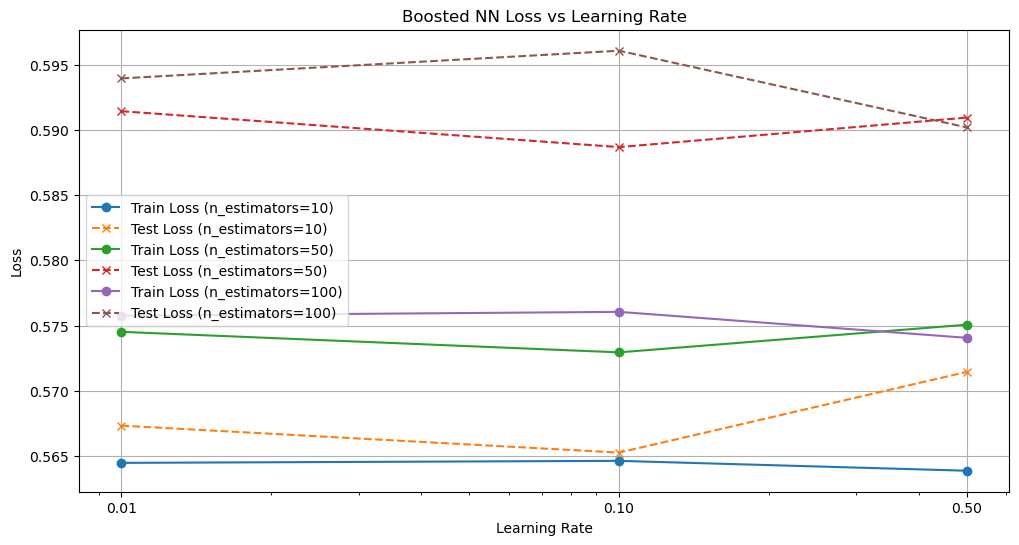

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

def test_models_with_hyperparameters(dataset, test_size=0.2, n_estimators_list=[10, 50, 100], learning_rate_list=[0.01, 0.1, 0.5]):
    '''
        Tests OneLayerNN and Boosted_NN with varying hyperparameters.
        :param dataset: The path to the dataset
        :param test_size: Fraction of the dataset to be used for testing
        :param n_estimators_list: List of values for the number of estimators
        :param learning_rate_list: List of values for the learning rate
        :return: None
    '''

    # Check if the file exists
    if not os.path.exists(dataset):
        print(f'The file {dataset} does not exist')
        return

    # Load in the dataset
    data = np.loadtxt(dataset, skiprows=1)
    X, Y = data[:, 1:], data[:, 0]

    # Normalize the features
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Split dataset
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

    # Add a bias term to the features
    X_train_b = np.append(X_train, np.ones((len(X_train), 1)), axis=1)
    X_test_b = np.append(X_test, np.ones((len(X_test), 1)), axis=1)

    # Results storage for plotting
    nn_train_losses = []
    nn_test_losses = []
    boosted_train_losses = {}
    boosted_test_losses = {}

    #### 1-Layer NN ######
    print('----- 1-Layer NN -----')
    nnmodel = OneLayerNN()
    nnmodel.fit(X_train_b, Y_train, np.ones(X_train_b.shape[0]))
    nn_train_loss = nnmodel.average_loss(X_train_b, Y_train, np.ones(X_train_b.shape[0]))
    nn_test_loss = nnmodel.average_loss(X_test_b, Y_test, np.ones(X_test_b.shape[0]))
    nn_train_losses.append(nn_train_loss)
    nn_test_losses.append(nn_test_loss)
    # print('Average Training Loss (1-Layer NN):', nn_train_loss)
    # print('Average Testing Loss (1-Layer NN):', nn_test_loss)

    #### Boosted Neural Networks ######
    print('----- Boosted Neural Networks -----')
    for n_estimators in n_estimators_list:
        for learning_rate in learning_rate_list:
            print(f'Testing Boosted_NN with n_estimators={n_estimators}, learning_rate={learning_rate}')
            model = Boosted_Model(n_estimators=n_estimators, learning_rate=learning_rate)
            model.train(X_train_b, Y_train)
            train_loss = model.loss(X_train_b, Y_train)
            test_loss = model.loss(X_test_b, Y_test)
            print(f'Training Loss: {train_loss}, Testing Loss: {test_loss}')

            # Store results
            boosted_train_losses[(n_estimators, learning_rate)] = train_loss
            boosted_test_losses[(n_estimators, learning_rate)] = test_loss

    # Plot the results
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot for Boosted NN
    for n_estimators in n_estimators_list:
        train_losses = [boosted_train_losses[(n_estimators, lr)] for lr in learning_rate_list]
        test_losses = [boosted_test_losses[(n_estimators, lr)] for lr in learning_rate_list]
        
        ax.plot(learning_rate_list, train_losses, marker='o', label=f'Train Loss (n_estimators={n_estimators})')
        ax.plot(learning_rate_list, test_losses, marker='x', label=f'Test Loss (n_estimators={n_estimators})', linestyle='--')
    
    ax.set_title('Boosted NN Loss vs Learning Rate')
    ax.set_xlabel('Learning Rate')
    ax.set_ylabel('Loss')
    ax.set_xscale('log')  # Keep the log scale for learning rates
    ax.set_xticks(learning_rate_list)  # Explicitly set the ticks
    ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())  # Ensure proper formatting of tick labels
    ax.legend()
    ax.grid(True)
    plt.show()

test_models_with_hyperparameters('wine.txt')

----Testing for Boosted_NN Model Correctness-----


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [57]:
def test_Boosted_vs_WeakLearner():

    print('----Testing for Boosted_NN vs Weak Learner-----')

    test_cases = [
        {
            "X_test": np.array([[0, 4, 1], [0, 3, 1], [5, 0, 1], [4, 1, 1], [0, 5, 1]]),
            "Y_test": np.array([0, 0, 1, 1, 0]),
            "description": "Synthetic small dataset"
        },
        {
            "X_test": np.array([[2, 1, 3], [1, 2, 1], [3, 3, 3], [4, 0, 2], [5, 1, 1]]),
            "Y_test": np.array([1, 0, 1, 1, 0]),
            "description": "Synthetic dataset with varying inputs"
        },
        {
            "X_test": np.array([[0, 0, 1], [1, 1, 1], [2, 2, 1], [3, 3, 1], [4, 4, 1]]),
            "Y_test": np.array([1, 2, 3, 4, 5]),
            "description": "Synthetic regression dataset"
        }
    ]

    for idx, case in enumerate(test_cases):
        X_test = case["X_test"]
        Y_test = case["Y_test"]
        description = case["description"]

        print(f"\n---Testing on {description}---")

        np.random.seed(idx+4)
        random.seed(idx+4)

        boosted_model = Boosted_Model("nn", n_estimators=10, learning_rate=0.1, random_state=0)
        weak_learner = OneLayerNN()

        data_weights = np.ones(len(Y_test)) / len(Y_test)

        boosted_model.train(X_test, Y_test)

        weak_learner.fit(X_test, Y_test, data_weights)

        boosted_loss = boosted_model.loss(X_test, Y_test)
        weak_loss = weak_learner.loss(X_test, Y_test, data_weights)

        print(f"Weak Learner Loss: {weak_loss}")
        print(f"Boosted Model Loss: {boosted_loss}")

        if boosted_loss < weak_loss:
            print("Boosted model performs better than the weak learner.")
        else:
            print("Boosted model does not improve over the weak learner.")

        boosted_avg_loss = boosted_model.loss(X_test, Y_test)
        weak_avg_loss = weak_learner.average_loss(X_test, Y_test, data_weights)

        print(f"Weak Learner Average Loss: {weak_avg_loss}")
        print(f"Boosted Model Average Loss: {boosted_avg_loss}")

        if boosted_avg_loss < weak_avg_loss:
            print("Boosted model has lower average loss than the weak learner.")
        else:
            print("Boosted model does not improve in average loss over the weak learner.")

test_Boosted_vs_WeakLearner()


----Testing for Boosted_NN vs Weak Learner-----

---Testing on Synthetic small dataset---


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Test Against the sklearn implementation 

Running models on wine.txt dataset
----- 1-Layer Stumps -----
Average Training Loss: 0.6505357886168747
Average Testing Loss: 0.6875904538423815
----- Our Boosted Network (Decision Stumps) -----
Num Estimators:  100
Learning Rate:  1
Average Training Loss: 0.7023261831185049
Average Testing Loss: 0.719118753024704
----- sklearn Boosted Network (Decision Stumps) -----
Average Training Loss: 0.5631981193160046
Average Testing Loss: 0.6015461722875634
----- 1-Layer NN -----
Average Training Loss: 0.5614259097798575
Average Testing Loss: 0.5985943946824918
----- Boosted Neural Network -----
Num Estimators:  25
Learning Rate:  0.5
Average Training Loss: 0.5566066189193396
Average Testing Loss: 0.5962706598563772
----- sklearn Boosted Network (Our NN) -----
Average Training Loss: 0.5659198266971857
Average Testing Loss: 0.6042774115349053


## References

#TODO they should be in the Harvard Citation Format apparently 